<a href="https://colab.research.google.com/github/saihaneesh26/ML-projects/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

In [ ]:
#getting the stocks datasets
df = web.DataReader('INDUSINDBK.NS',data_source='yahoo',start='2020-04-01',end='2020-07-29')
#show the dataset
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-01,390.000000,320.000000,386.399994,342.250000,33427621,342.250000
2020-04-03,350.000000,310.200012,350.000000,313.200012,23013838,313.200012
2020-04-07,391.500000,344.500000,344.500000,383.850006,45710645,383.850006
2020-04-08,441.399994,362.000000,382.000000,399.149994,56093585,399.149994
2020-04-09,425.000000,384.000000,425.000000,395.399994,32940091,395.399994
...,...,...,...,...,...,...
2020-07-24,536.700012,500.000000,505.799988,522.250000,31277822,522.250000
2020-07-27,523.849976,505.000000,522.549988,506.649994,12280255,506.649994
2020-07-28,529.000000,511.399994,512.000000,526.950012,16991267,526.950012


In [ ]:
df.shape

(81, 6)

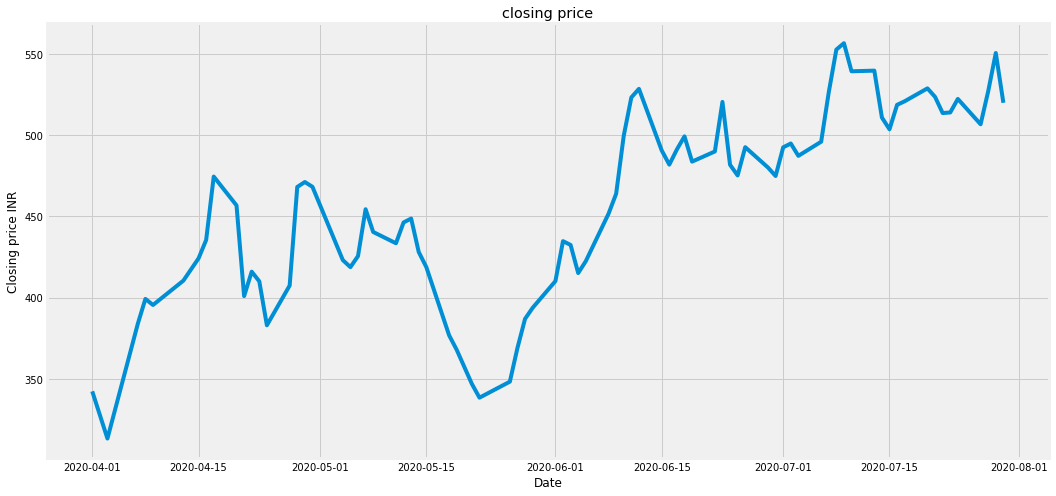

In [ ]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price INR')
plt.show()

In [ ]:
#create new database with only coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

65

In [ ]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
scaled_data

In [ ]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [ ]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5, 60, 1)

In [ ]:
#build LSTM model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,epochs=15,steps_per_epoch=5)

In [ ]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to numpy 
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#geting the root_mean_squared error(RMSE)
rmse=np.sqrt( np.mean(predictions-y_test)**2)
rmse

108.43471336364746

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


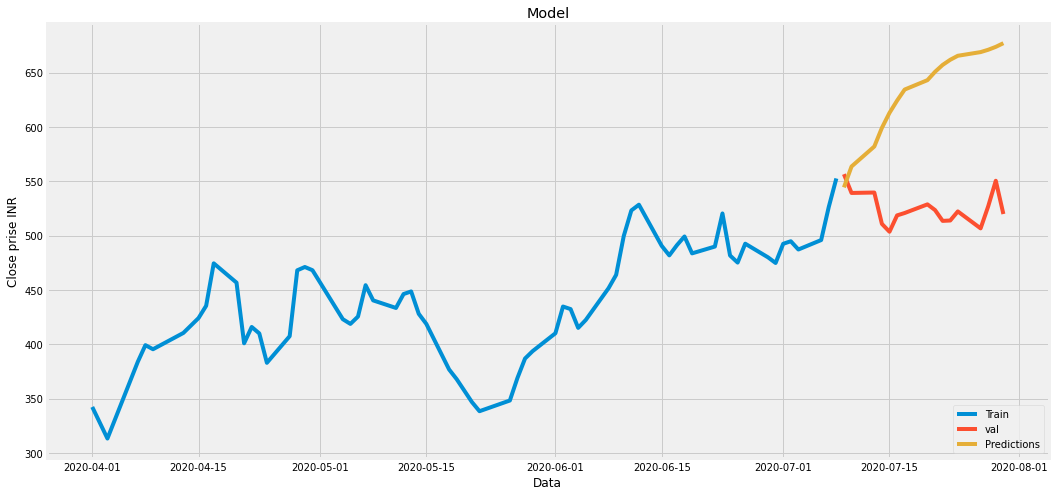

In [ ]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()

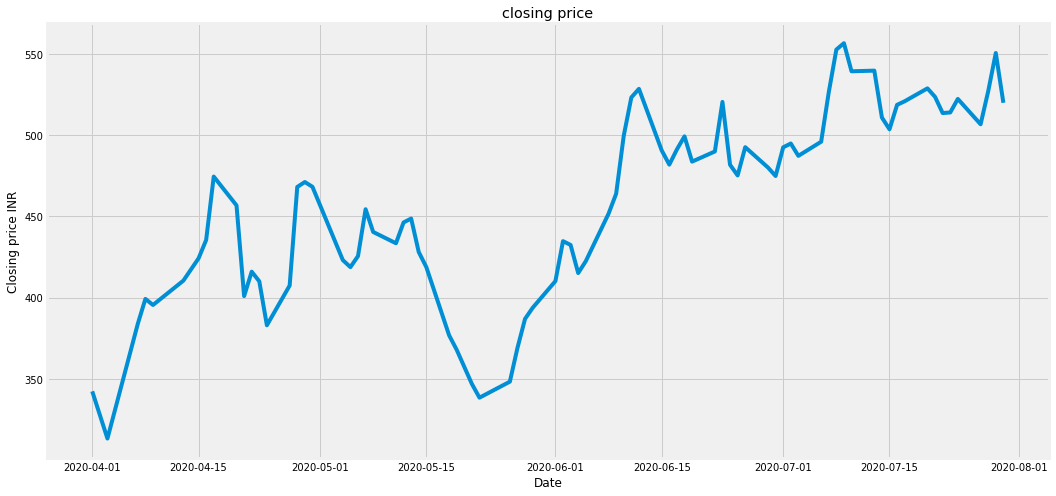

In [ ]:
plt.figure(figsize=(16,8))
plt.title('closing price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price INR')
plt.show()

In [ ]:
#show the valid and predicted value
valid

,Close,Predictions
Date,,
2020-07-09,556.549988,564.192139
2020-07-10,539.250000,580.072754
2020-07-13,539.650024,594.659119
2020-07-14,510.799988,607.862000
2020-07-15,503.549988,618.027893
2020-07-16,518.599976,625.998413
2020-07-17,520.799988,633.153381
2020-07-20,528.750000,639.226929
2020-07-21,523.500000,644.716553
